# Importing Libraries

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import seaborn as sea

# Reading the Train and Test files

In [24]:
train = pd.read_csv(r'C:\Users\Sunil Bharadhwaj C\Documents\Internshala\Data Science\4_final\train.csv')
test = pd.read_csv(r'C:\Users\Sunil Bharadhwaj C\Documents\Internshala\Data Science\4_final\test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [25]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,11,108
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,8,81
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,7,83
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,13,48
4398,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65.0,8.9981,12,37


In [26]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [27]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

# Univariate Analysis

(array([5557., 2966., 1913., 1113.,  666.,  405.,  219.,   88.,   47.,
           6.]),
 array([  1. ,  96.6, 192.2, 287.8, 383.4, 479. , 574.6, 670.2, 765.8,
        861.4, 957. ]),
 <BarContainer object of 10 artists>)

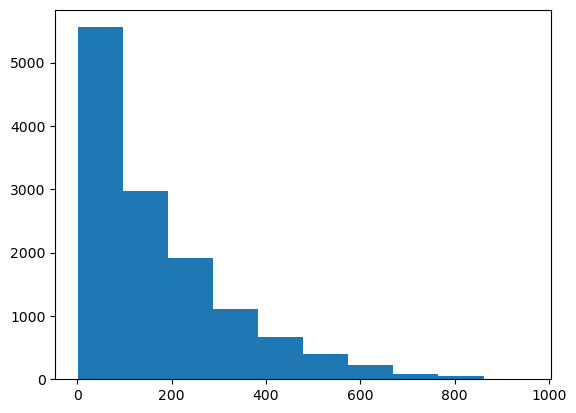

In [28]:
# Frequency plot of Target variable - 'count' in the Train set :
plt.hist(train['count'])

# Bivariate Analysis

In [29]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [30]:
# Finding Correlation for all the continous variables
corr = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


<Axes: >

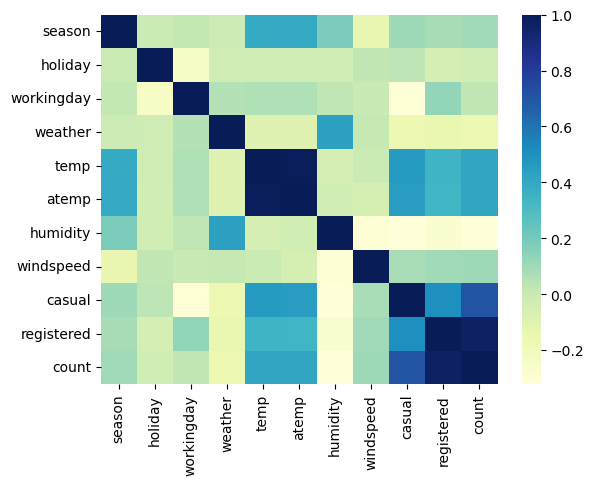

In [31]:
sea.heatmap(corr, cmap = "YlGnBu")

From the above correlations we can infer that :
1. Temperature is having the most positive correlation with the Target variable amoung any other wearher parameters.
2. Humidity is less negatively affecting the Target variable next to the Temperature.
3. Registered users rent the bike more often than the Casual users.

Dropping down 'datetime' column in both Train and Test data frame.

In [32]:
train = train.drop('datetime', axis  = 1)
train.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
12975,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48
12979,3,0,0,3,26.24,28.790,89.0,11.0014,4,65,69


In [33]:
test = test.drop('datetime', axis  = 1)
test.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
4394,1,0,1,2,10.66,12.880,60.0,11.0014,11,108
4395,1,0,1,2,10.66,12.880,60.0,11.0014,8,81
4396,1,0,1,1,10.66,12.880,60.0,11.0014,7,83
4397,1,0,1,1,10.66,13.635,56.0,8.9981,13,48
4398,1,0,1,1,10.66,13.635,65.0,8.9981,12,37


# Linear Regression Algorithm

In [34]:
lreg = LinearRegression()
# Creating dummy columns for the catogorical variables
train = pd.get_dummies(train)
train.shape

(12980, 11)

In [44]:
test = pd.get_dummies(test)
test.shape

(4399, 10)

Extracting Independent and Dependent variables from the Train and Test datasets repectively.

In [36]:
x_train = train.drop('count', axis = 1)
y_train = train['count']

Training the model :

In [37]:
lreg.fit(x_train, y_train)

LinearRegression()

Model prediction :

In [38]:
pred = lreg.predict(test)

Model score :

In [39]:
lreg.score(x_train, y_train)

1.0

In [40]:
lreg.score(test,pred)

1.0

As model score is equal one, the algorithm stays fit for this dataset.

# Exporting The Predicted Values

In [41]:
a = []
for i in pred :
    a.append(int(i))

In [42]:
def export_to_text(data, filename):
    with open(filename, 'w') as file:
        for item in data:
            file.write(str(item) + '\n')

export_to_text(a, 'output.txt')